In [1]:
from importlib import reload
import numpy as np
pi=np.pi
#
import matplotlib.pyplot as plt
import matplotlib as mpl

from functools import partial
import copy

In [2]:
import phasr as phr

In [3]:
phr.__version__

'0.3.1.dev0+gea06a1e.d20250207'

# Kinematik of the experiments

In [4]:
#Pb: 
q_Pb = np.sqrt(0.00616*1e6)
theta_Pb = 4.7*pi/180 #L: 4.71(2) R: 4.67(2)
print(q_Pb)
#Ca: 
q_Ca = np.sqrt(0.0297*1e6)
theta_Ca = 4.51*pi/180
print(q_Ca)
#Al:
q_Al = np.sqrt(0.02357*1e6)
theta_Al = 7.61*pi/180
print(q_Al)

78.48566748139433
172.33687939614086
153.52524222420234


In [5]:
#Pb:
#approx
print(q_Pb/(2*np.sin(theta_Pb/2)))
#approx
#Ca: 
#approx
print(q_Ca/(2*np.sin(theta_Ca/2)))
#Al:
#approx
print(q_Al/(2*np.sin(theta_Al/2)))

957.0550135868299
2189.961300796471
1156.7434233585843


# Horowitz

In [4]:
def weak_density_model(r,lam,nucleus): return (nucleus.Qw/nucleus.Z)*lam**3*nucleus.charge_density(lam*r)

## Pb208

In [5]:
Pb208_test1 = phr.nucleus('Pb208_test_100',Z=82,A=208,c=6.4,z=0.54,w=0.32)
Pb208_test1.fill_gaps()
Pb208_test2 = phr.nucleus('Pb208_test_095',Z=82,A=208,c=6.4,z=0.54,w=0.32)
Pb208_test2.fill_gaps()

data loaded from  ./tmp/nucleus_splines/electric_field_Pb208_test_100fermi3p_x=0.0-20.0-0.02.txt
data loaded from  ./tmp/nucleus_splines/electric_potential_Pb208_test_100fermi3p_x=0.0-20.0-0.02.txt
data loaded from  ./tmp/nucleus_splines/form_factor_Pb208_test_100fermi3p_x=0.0-1000.0-1.0.txt
data loaded from  ./tmp/nucleus_splines/electric_field_Pb208_test_095fermi3p_x=0.0-20.0-0.02.txt
data loaded from  ./tmp/nucleus_splines/electric_potential_Pb208_test_095fermi3p_x=0.0-20.0-0.02.txt
data loaded from  ./tmp/nucleus_splines/form_factor_Pb208_test_095fermi3p_x=0.0-1000.0-1.0.txt


In [6]:
Pb208_test1.weak_density = partial(weak_density_model,lam=1.00,nucleus=Pb208_test1)
Pb208_test1.update_dependencies()
Pb208_test2.weak_density = partial(weak_density_model,lam=0.9502,nucleus=Pb208_test2)
Pb208_test2.update_dependencies()

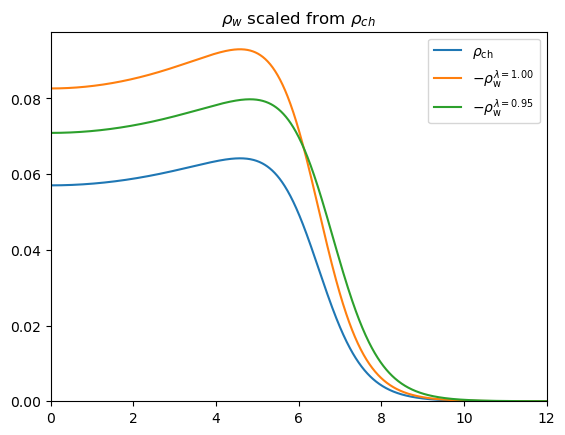

In [7]:
r=np.arange(0,12,1e-2)
plt.title(r'$\rho_w$ scaled from $\rho_{ch}$')
plt.plot(r,Pb208_test1.charge_density(r),label=r'$\rho_\operatorname{ch}$')
plt.plot(r,-Pb208_test1.weak_density(r),label=r'$-\rho_\operatorname{w}^{\lambda=1.00}$')
plt.plot(r,-Pb208_test2.weak_density(r),label=r'$-\rho_\operatorname{w}^{\lambda=0.95}$')
plt.xlim(0,12)
plt.ylim(0,)
plt.legend()

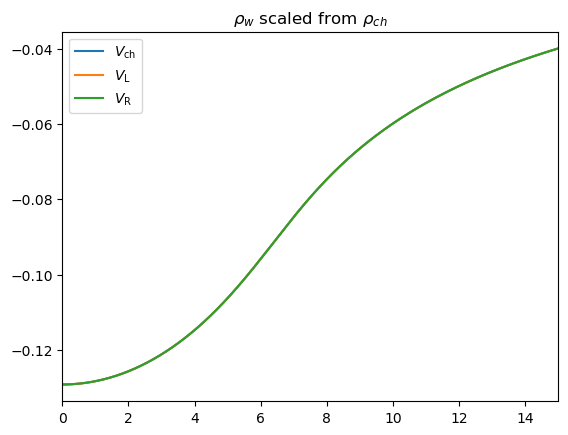

In [8]:
r=np.arange(0,15,1e-2)
plt.title(r'$\rho_w$ scaled from $\rho_{ch}$')
plt.plot(r,Pb208_test1.electric_potential(r),label=r'$V_\operatorname{ch}$')
plt.plot(r,Pb208_test1.electric_potential(r)-Pb208_test1.weak_potential(r),label=r'$V_\operatorname{L}$')
plt.plot(r,Pb208_test1.electric_potential(r)+Pb208_test1.weak_potential(r),label=r'$V_\operatorname{R}$')
plt.xlim(0,15)
#plt.ylim(-0.13,-0.12)
plt.legend()

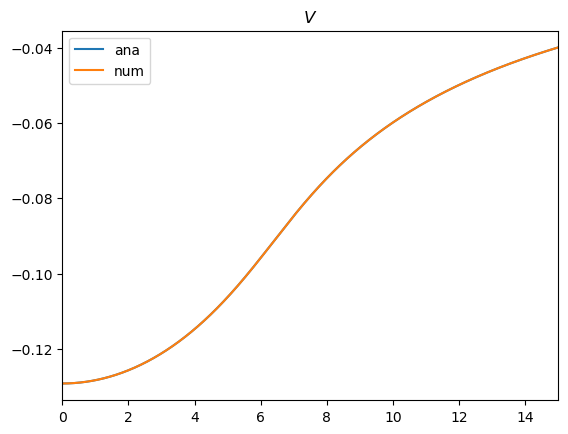

In [9]:
r=np.arange(0,15,1e-2)
plt.title(r'$V$')
plt.plot(r,Pb208_test1.electric_potential_ana(r),label=r'ana')
plt.plot(r,Pb208_test1.electric_potential(r),label=r'num')
plt.xlim(0,15)
#plt.ylim(-0.13,-0.12)
plt.legend()

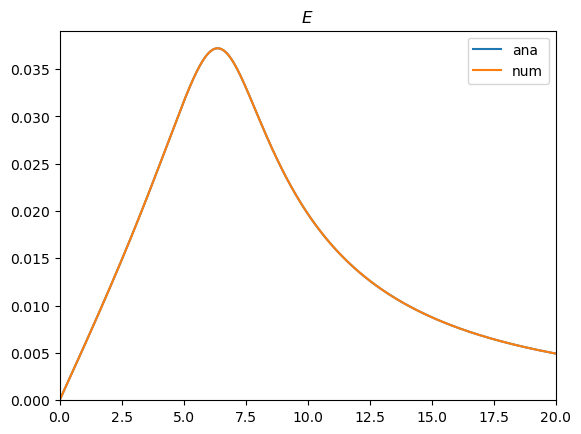

In [10]:
r=np.arange(1e-3,20,1e-2)
plt.title(r'$E$')
plt.plot(r,Pb208_test1.electric_field_ana(r),label=r'ana')
plt.plot(r,Pb208_test1.electric_field(r),label=r'num')
plt.xlim(0,20)
plt.ylim(0,)
plt.legend()

In [11]:
print(Pb208_test1.Vmin)
print(Pb208_test1.Vmin_ana)

-0.12919621029287431
-0.1291961769809547


## He4

In [112]:
He4_test1 = phr.nucleus('He4_test_100',Z=2,A=4,c=1.008,z=0.327,w=0.445)
He4_test1.fill_gaps()
He4_test2 = phr.nucleus('He4_test_095',Z=2,A=4,c=1.008,z=0.327,w=0.445)
He4_test2.fill_gaps()

data not found at ./tmp/nucleus_splines/electric_field_He4_test_100fermi3p_x=0.0-20.0-0.02.txt or forced to recreate.
This may take some time.
data saved in  ./tmp/nucleus_splines/electric_field_He4_test_100fermi3p_x=0.0-20.0-0.02.txt
data not found at ./tmp/nucleus_splines/electric_potential_He4_test_100fermi3p_x=0.0-20.0-0.02.txt or forced to recreate.
This may take some time.
data saved in  ./tmp/nucleus_splines/electric_potential_He4_test_100fermi3p_x=0.0-20.0-0.02.txt
data not found at ./tmp/nucleus_splines/form_factor_He4_test_100fermi3p_x=0.0-1000.0-1.0.txt or forced to recreate.
This may take some time.
data saved in  ./tmp/nucleus_splines/form_factor_He4_test_100fermi3p_x=0.0-1000.0-1.0.txt
data not found at ./tmp/nucleus_splines/electric_field_He4_test_095fermi3p_x=0.0-20.0-0.02.txt or forced to recreate.
This may take some time.
data saved in  ./tmp/nucleus_splines/electric_field_He4_test_095fermi3p_x=0.0-20.0-0.02.txt
data not found at ./tmp/nucleus_splines/electric_potenti

In [113]:
He4_test1.weak_density = partial(weak_density_model,lam=1.00,nucleus=He4_test1)
He4_test1.update_dependencies()
He4_test2.weak_density = partial(weak_density_model,lam=np.sqrt(0.99),nucleus=He4_test2) # unclear what value for lambda
He4_test2.update_dependencies()

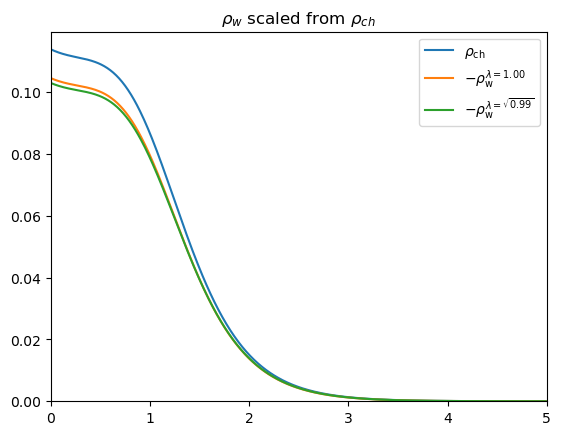

In [114]:
r=np.arange(0,5,1e-2)
plt.title(r'$\rho_w$ scaled from $\rho_{ch}$')
plt.plot(r,He4_test1.charge_density(r),label=r'$\rho_\operatorname{ch}$')
plt.plot(r,-He4_test1.weak_density(r),label=r'$-\rho_\operatorname{w}^{\lambda=1.00}$')
plt.plot(r,-He4_test2.weak_density(r),label=r'$-\rho_\operatorname{w}^{\lambda=\sqrt{0.99}}$')
plt.xlim(0,5)
plt.ylim(0,)
plt.legend()

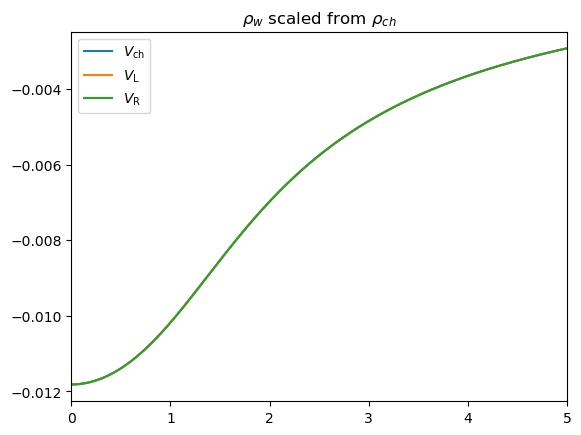

In [115]:
r=np.arange(0,5,1e-2)
plt.title(r'$\rho_w$ scaled from $\rho_{ch}$')
plt.plot(r,He4_test1.electric_potential(r),label=r'$V_\operatorname{ch}$')
plt.plot(r,He4_test1.electric_potential(r)-He4_test1.weak_potential(r),label=r'$V_\operatorname{L}$')
plt.plot(r,He4_test1.electric_potential(r)+He4_test1.weak_potential(r),label=r'$V_\operatorname{R}$')
plt.xlim(0,5)
#plt.ylim(-0.13,-0.12)
plt.legend()

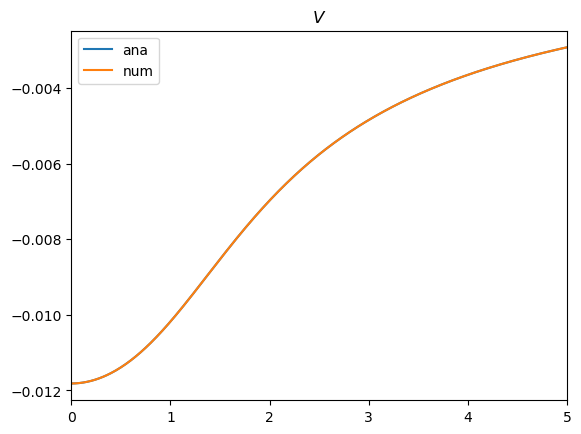

In [116]:
r=np.arange(0,5,1e-2)
plt.title(r'$V$')
plt.plot(r,He4_test1.electric_potential_ana(r),label=r'ana')
plt.plot(r,He4_test1.electric_potential(r),label=r'num')
plt.xlim(0,5)
#plt.ylim(-0.13,-0.12)
plt.legend()

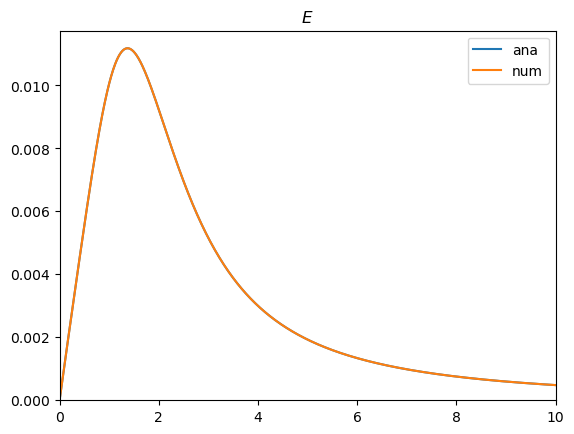

In [117]:
r=np.arange(1e-3,10,1e-2)
plt.title(r'$E$')
plt.plot(r,He4_test1.electric_field_ana(r),label=r'ana')
plt.plot(r,He4_test1.electric_field(r),label=r'num')
plt.xlim(0,10)
plt.ylim(0,)
plt.legend()

In [118]:
print(He4_test1.Vmin)
print(He4_test1.Vmin_ana)

-0.01181459495047158
-0.011814594146245952


# A_PV (compare Horowitz 1998)

## Pb208

### Optimise settings

In [33]:
Pb208_ref_test = phr.nuclei.references.load_reference_nucleus(82,208)[0]
Pb208_ref_test.weak_density = partial(weak_density_model,lam=1.00,nucleus=Pb208_ref_test)
Pb208_ref_test.update_dependencies()

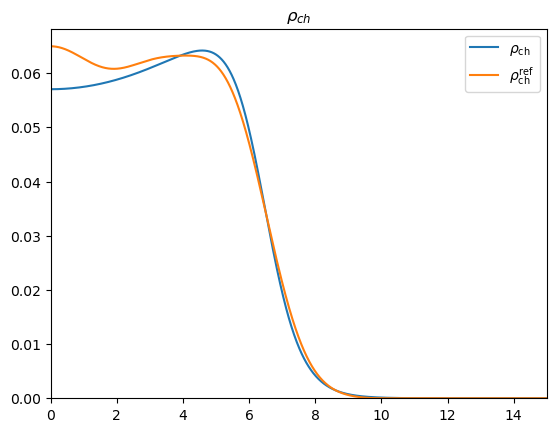

In [36]:
r=np.arange(0,15,1e-2)
plt.title(r'$\rho_{ch}$')
plt.plot(r,Pb208_test1.charge_density(r),label=r'$\rho_\operatorname{ch}$')
plt.plot(r,Pb208_ref_test.charge_density(r),label=r'$\rho^\operatorname{ref}_\operatorname{ch}$')
plt.xlim(0,15)
plt.ylim(0,)
plt.legend()

In [22]:
theta_deg=np.arange(1,15,1e-1)
E_MeV=850
A_PV_ref_test = phr.dirac_solvers.post_processing.crosssection.left_right_asymmetry_lepton_nucleus_scattering(E_MeV,theta_deg*pi/180,Pb208_ref_test,verbose=False)

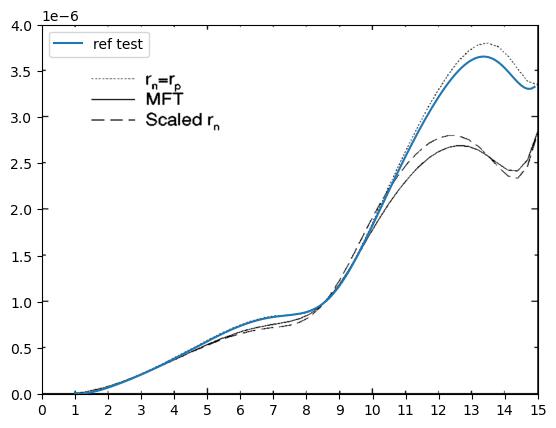

In [23]:
img = plt.imread("../data_electronscattering/Pb208_ACP_ref.png")
#plt.figure(figsize=(10,10))
plt.imshow(img, extent=[0,15,0, 4e-6],aspect='auto')
#
plt.plot(theta_deg,A_PV_ref_test,label='ref test')
#
plt.xticks(np.arange(0,16,1))
plt.xlim(0,15)
plt.ylim(0,4e-6)
plt.legend()

In [24]:
theta_deg=np.arange(1,50,1e-1)
E_MeV=850
args_APV_Pb208=phr.dirac_solvers.post_processing.crosssection.optimise_left_right_asymmetry_precision(E_MeV,theta_deg*pi/180,Pb208_ref_test,left_right_asymmetry_precision=1e-2)

new best: {'method': 'DOP853', 'N_partial_waves': 120, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 0.0}
time: 68.30516982078552 diff: 0.0
new best: {'method': 'DOP853', 'N_partial_waves': 120, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-15}
time: 66.15119647979736 diff: 0.0
new best: {'method': 'DOP853', 'N_partial_waves': 120, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-14}
time: 62.623008489608765 diff: 2.409732765304056e-06
new best: {'method': 'DOP853', 'N_partial_waves': 120, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-13}
time: 60.24090242385864 diff: 2.3846314094053963e-05
new best: {'method': 'DOP853', 'N_partial_waves': 120, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-12}
time: 57.307941198349 diff: 6.375751315805257e-06
new best: {'method': 'DOP853', 'N_partial_waves'

In [25]:
args_APV_Pb208={'method': 'DOP853', 'N_partial_waves': 120, 'atol': 1e-10, 'rtol': 1e-09, 'energy_norm': 0.1973269804, 'phase_difference_limit': 1e-06}

In [26]:
theta_deg=np.arange(1,15,1e-1)
E_MeV=850
A_PV_ref_test_opt = phr.dirac_solvers.post_processing.crosssection.left_right_asymmetry_lepton_nucleus_scattering(E_MeV,theta_deg*pi/180,Pb208_ref_test,verbose=False,**args_APV_Pb208)

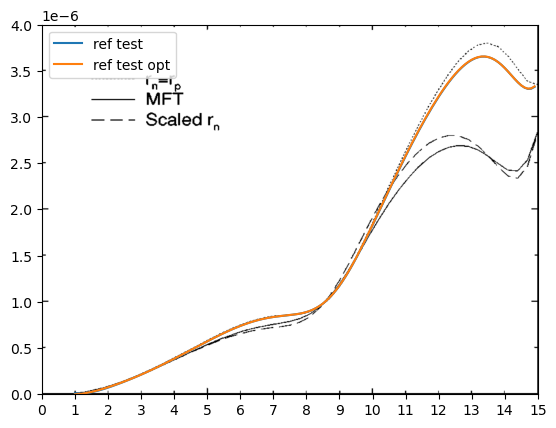

In [27]:
img = plt.imread("../data_electronscattering/Pb208_ACP_ref.png")
#plt.figure(figsize=(10,10))
plt.imshow(img, extent=[0,15,0, 4e-6],aspect='auto')
#
plt.plot(theta_deg,A_PV_ref_test,label='ref test')
plt.plot(theta_deg,A_PV_ref_test_opt,label='ref test opt')
#
plt.xticks(np.arange(0,16,1))
plt.xlim(0,15)
plt.ylim(0,4e-6)
plt.legend()

### Compare

In [81]:
args_APV_Pb208={'method': 'DOP853', 'N_partial_waves': 120, 'atol': 1e-10, 'rtol': 1e-09, 'energy_norm': 0.1973269804, 'phase_difference_limit': 1e-06}

In [87]:
theta_deg=np.arange(1,50,1e-1)
E_MeV=850
print('Start')
A_PV1 = phr.dirac_solvers.post_processing.crosssection.left_right_asymmetry_lepton_nucleus_scattering(E_MeV,theta_deg*pi/180,Pb208_test1,verbose=False,**args_APV_Pb208)
print('APV1 done')
A_PV2 = phr.dirac_solvers.post_processing.crosssection.left_right_asymmetry_lepton_nucleus_scattering(E_MeV,theta_deg*pi/180,Pb208_test2,verbose=False,**args_APV_Pb208)
print('APV2 done')

Start
APV1 done
APV2 done


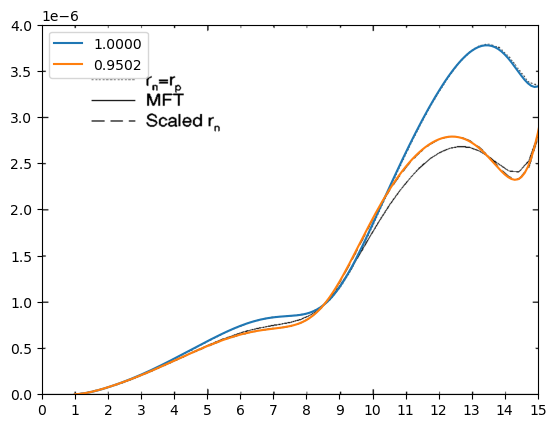

In [91]:
img = plt.imread("../data_electronscattering/Pb208_ACP_ref.png")
#plt.figure(figsize=(10,10))
plt.imshow(img, extent=[0,15.04,-0.01e-6, 3.99e-6],aspect='auto')
#
plt.plot(theta_deg,A_PV1,label='1.0000')
plt.plot(theta_deg,A_PV2,label='0.9502')
#
plt.xticks(np.arange(0,16,1))
plt.xlim(0,15)
plt.ylim(0,4e-6)
plt.legend()

(0.0, 5e-05)

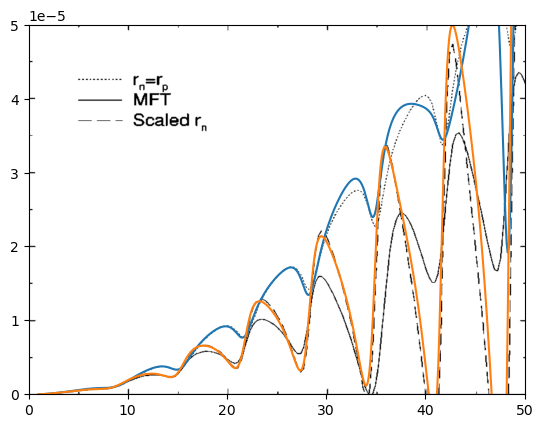

In [92]:
img = plt.imread("../data_electronscattering/Pb208_ACP_ref2.png")
#plt.figure(figsize=(10,10))
plt.imshow(img, extent=[0,50,0, 5e-5],aspect='auto')
#
#
plt.plot(theta_deg,A_PV1,label='1.0000')
plt.plot(theta_deg,A_PV2,label='0.9502')
#
#plt.xticks(np.arange(0,16,1))
plt.xlim(0,50)
plt.ylim(0,5e-5)
#plt.legend()

In [ ]:
theta_deg=np.arange(1,50,1e-1)
E1_MeV=502
E2_MeV=850
E3_MeV=3000
print('Start')
A_PV_502 = phr.dirac_solvers.post_processing.crosssection.left_right_asymmetry_lepton_nucleus_scattering(E1_MeV,theta_deg*pi/180,Pb208_test1,verbose=False,**args_APV_Pb208)
print('502 done')
A_PV_850 = phr.dirac_solvers.post_processing.crosssection.left_right_asymmetry_lepton_nucleus_scattering(E2_MeV,theta_deg*pi/180,Pb208_test1,verbose=False,**args_APV_Pb208)
print('850 done')
A_PV_3000 = phr.dirac_solvers.post_processing.crosssection.left_right_asymmetry_lepton_nucleus_scattering(E3_MeV,theta_deg*pi/180,Pb208_test1,verbose=False,**args_APV_Pb208)
print('3000 done')

In [ ]:
q1_fm = 2*E1_MeV/phr.constants.hc*np.sin(theta_deg/2)
q2_fm = 2*E2_MeV/phr.constants.hc*np.sin(theta_deg/2)
q3_fm = 2*E3_MeV/phr.constants.hc*np.sin(theta_deg/2)

(0.0, 3e-05)

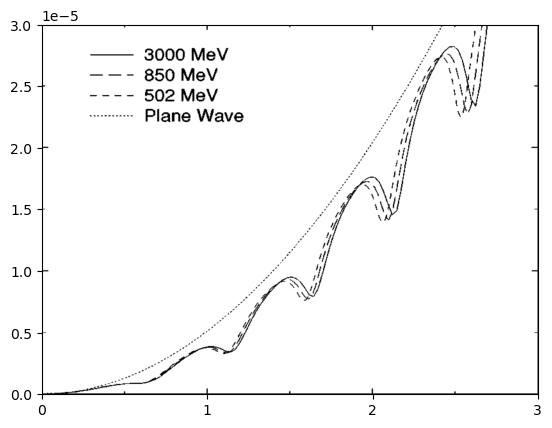

In [94]:
img = plt.imread("../data_electronscattering/Pb208_ACP_ref3.png")
#plt.figure(figsize=(10,10))
plt.imshow(img, extent=[0,3,0, 3e-5],aspect='auto')
#
plt.plot(q1_fm,A_PV_502,label='502')
plt.plot(q2_fm,A_PV_850,label='850')
plt.plot(q3_fm,A_PV_3000,label='3000')
#
plt.xticks(np.arange(0,16,1))
plt.xlim(0,3)
plt.ylim(0,3e-5)
#plt.legend()

# H4

### Optimise Settings

In [119]:
He3_ref_test = phr.nuclei.references.load_reference_nucleus(2,3)
He3_ref_test.weak_density = partial(weak_density_model,lam=1.00,nucleus=He3_ref_test)
He3_ref_test.update_dependencies()

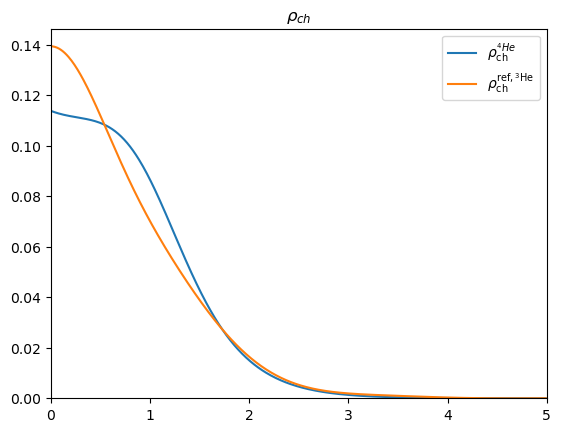

In [120]:
r=np.arange(0,5,1e-2)
plt.title(r'$\rho_{ch}$')
plt.plot(r,He4_test1.charge_density(r),label=r'$\rho^{^{4}He}_\operatorname{ch}$')
plt.plot(r,He3_ref_test.charge_density(r),label=r'$\rho^\operatorname{ref,^{3}He}_\operatorname{ch}$')
plt.xlim(0,5)
plt.ylim(0,)
plt.legend()

In [121]:
# no good FB parameterisation need to optimise direct description
# need to run on fast maschine!

In [ ]:
# very slow ->

In [143]:
theta_deg=np.arange(1,60,1e-1)
E_MeV=850
A_PV_ref_test = phr.dirac_solvers.post_processing.crosssection.left_right_asymmetry_lepton_nucleus_scattering(E_MeV,theta_deg*pi/180,He4_test1,verbose=False,**{'method': 'DOP853', 'N_partial_waves': 120, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 0.0})

KeyboardInterrupt: 

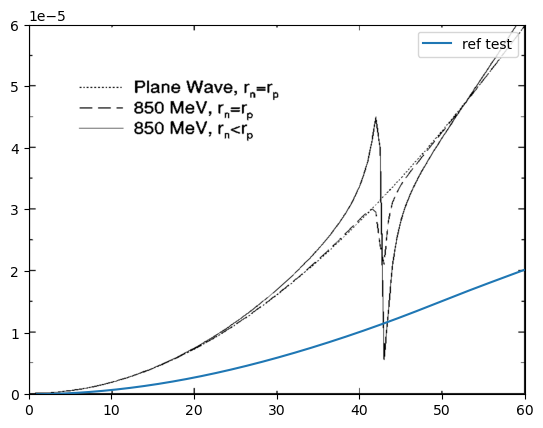

In [136]:
img = plt.imread("../data_electronscattering/He4_ACP_ref.png")
#plt.figure(figsize=(10,10))
plt.imshow(img, extent=[0,60.0,0, 6e-5],aspect='auto')
plt.plot(theta_deg,A_PV_ref_test,label='ref test')
#
#plt.xticks(np.arange(0,16,1))
plt.xlim(0,60)
plt.ylim(0,6e-5)
plt.legend()

In [128]:
theta_deg=np.arange(1,60,1e-1)
E_MeV=850
args_APV_He4=phr.dirac_solvers.post_processing.crosssection.optimise_left_right_asymmetry_precision(E_MeV,theta_deg*pi/180,He4_test1,left_right_asymmetry_precision=1e-2)

new best: {'method': 'DOP853', 'N_partial_waves': 120, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 0.0}
time: 18.207270622253418 diff: 0.0
new best: {'method': 'DOP853', 'N_partial_waves': 120, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-15}
time: 16.40820550918579 diff: 0.0
new best: {'method': 'DOP853', 'N_partial_waves': 120, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-14}
time: 14.845350980758667 diff: 6.247708374288192e-08
new best: {'method': 'DOP853', 'N_partial_waves': 120, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-13}
time: 13.884968280792236 diff: 1.249542360927106e-07
new best: {'method': 'DOP853', 'N_partial_waves': 120, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-12}
time: 13.126539468765259 diff: 2.4077441868990277e-07
new best: {'method': 'DOP853', 'N_partial_w

In [130]:
args_APV_He3={'method': 'DOP853', 'N_partial_waves': 80, 'atol': 1e-11, 'rtol': 1e-11, 'energy_norm': 0.1973269804, 'phase_difference_limit': 1e-07}

In [131]:
theta_deg=np.arange(1,60,1e-1)
E_MeV=850
A_PV_ref_test_opt = phr.dirac_solvers.post_processing.crosssection.left_right_asymmetry_lepton_nucleus_scattering(E_MeV,theta_deg*pi/180,He4_test1,verbose=False,**args_APV_He3)

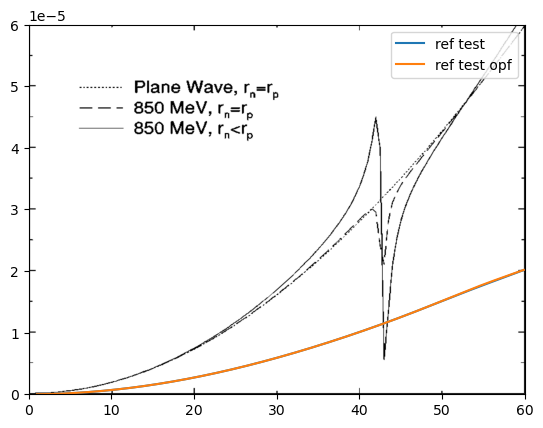

In [137]:
img = plt.imread("../data_electronscattering/He4_ACP_ref.png")
#plt.figure(figsize=(10,10))
plt.imshow(img, extent=[0,60.0,0, 6e-5],aspect='auto')
#
plt.plot(theta_deg,A_PV_ref_test,label='ref test')
plt.plot(theta_deg,A_PV_ref_test_opt,label='ref test opf')
#
#plt.xticks(np.arange(0,16,1))
plt.xlim(0,60)
plt.ylim(0,6e-5)
plt.legend()

### Compare

In [138]:
args_APV_He4={'method': 'DOP853', 'N_partial_waves': 80, 'atol': 1e-11, 'rtol': 1e-11, 'energy_norm': 0.1973269804, 'phase_difference_limit': 1e-07}

In [139]:
theta_deg=np.arange(1,60,1e-1)
E_MeV=850
print('Start')
A_PV1 = phr.dirac_solvers.post_processing.crosssection.left_right_asymmetry_lepton_nucleus_scattering(E_MeV,theta_deg*pi/180,He4_test1,verbose=False,**args_APV_He4)
print('APV1 done')
A_PV2 = phr.dirac_solvers.post_processing.crosssection.left_right_asymmetry_lepton_nucleus_scattering(E_MeV,theta_deg*pi/180,He4_test2,verbose=False,**args_APV_He4)
print('APV2 done')

Start
APV1 done
APV2 done


In [141]:
theta_deg=np.arange(1,60,1e-1)
E_MeV=850
print('Start')
A_PV1_2 = phr.dirac_solvers.post_processing.crosssection.left_right_asymmetry_lepton_nucleus_scattering(E_MeV,theta_deg*pi/180,He4_test1,verbose=False,**args_APV_Pb208)
print('APV1 done')
A_PV2_2 = phr.dirac_solvers.post_processing.crosssection.left_right_asymmetry_lepton_nucleus_scattering(E_MeV,theta_deg*pi/180,He4_test2,verbose=False,**args_APV_Pb208)
print('APV2 done')

Start
APV1 done
APV2 done


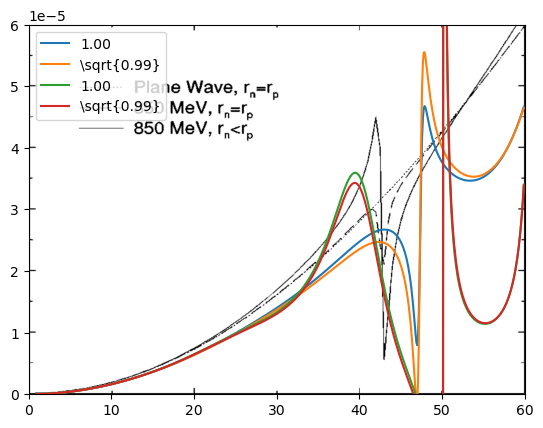

In [142]:
img = plt.imread("../data_electronscattering/He4_ACP_ref.png")
#plt.figure(figsize=(10,10))
plt.imshow(img, extent=[0,60.0,0, 6e-5],aspect='auto')
#
plt.plot(theta_deg,A_PV1,label='1.00')
plt.plot(theta_deg,A_PV2,label=r'\sqrt{0.99}')
#
plt.plot(theta_deg,A_PV1_2,label='1.00')
plt.plot(theta_deg,A_PV2_2,label=r'\sqrt{0.99}')

#
#
#plt.xticks(np.arange(0,16,1))
plt.xlim(0,60)
plt.ylim(0,6e-5)
plt.legend()

# pictures

(0.0, 4e-06)

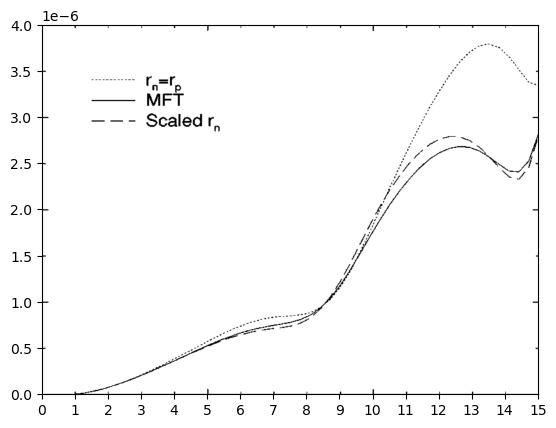

In [15]:
img = plt.imread("../data_electronscattering/Pb208_ACP_ref.png")
#plt.figure(figsize=(10,10))
plt.imshow(img, extent=[0,15.04,-0.01e-6, 3.99e-6],aspect='auto')
#
plt.xticks(np.arange(0,16,1))
plt.xlim(0,15)
plt.ylim(0,4e-6)
#plt.legend()

(0.0, 5e-05)

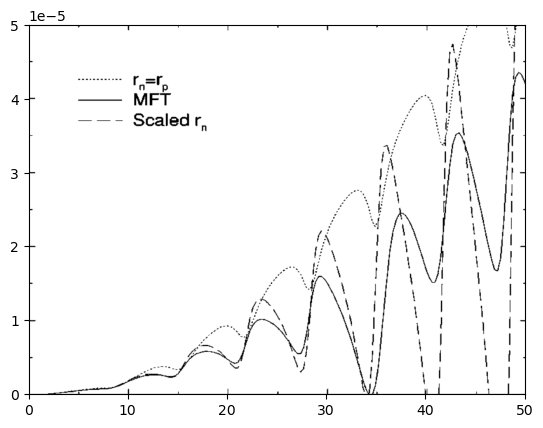

In [90]:
img = plt.imread("../data_electronscattering/Pb208_ACP_ref2.png")
#plt.figure(figsize=(10,10))
plt.imshow(img, extent=[0,50,0, 5e-5],aspect='auto')
#
plt.xlim(0,50)
plt.ylim(0,5e-5)
#plt.legend()

(0.0, 3e-05)

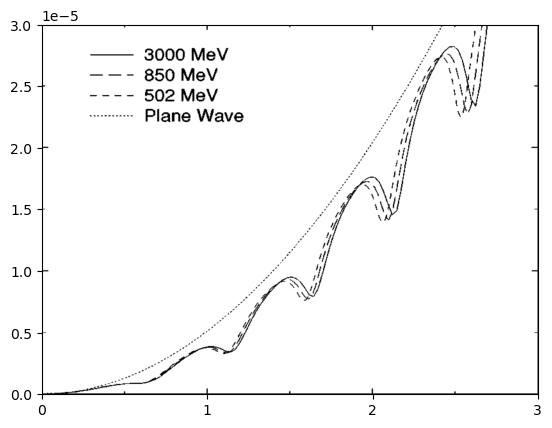

In [94]:
img = plt.imread("../data_electronscattering/Pb208_ACP_ref3.png")
#plt.figure(figsize=(10,10))
plt.imshow(img, extent=[0,3,0, 3e-5],aspect='auto')
#
plt.xticks(np.arange(0,16,1))
plt.xlim(0,3)
plt.ylim(0,3e-5)
#plt.legend()